<font style="font-size:24pt"> K-Means Clustering

<img src="pix/a-big-clod-crop.png" width=650>

 <ul style="font-size:18pt">
    <li>Iterative clustering algorithm<br><br>
    <li>Need to specify number $n$ of clusters in advance <br><br>
    <li>Each cluster is associated with a "cluster centroid"<br><br>
    <li>Initially the $n$ centroids are assigned randomly. <br><br>
    <li>Every point in the data set is assigned to a cluster based on the "nearest centroid" rule.<br><br>
    <li>It is possible to use different distance metrics<br><br>
    <li>Once each point is assigned to cluster, new cluster centroids are calculated. <br><br><li>The process is repeated until the cluster centers no longer move or an iteration limit is reached<r><br>
    <li>Resultting cluster assignment is to Voronoi tiling of centers
        

<img src="pix/voronoi-crop.png">

## Demonstrate with a mixture of gaussian clouds. 

## Read and plot the data

In [1]:
clouds=read.csv("../datasets/clouds.csv", header = TRUE, sep = ",")

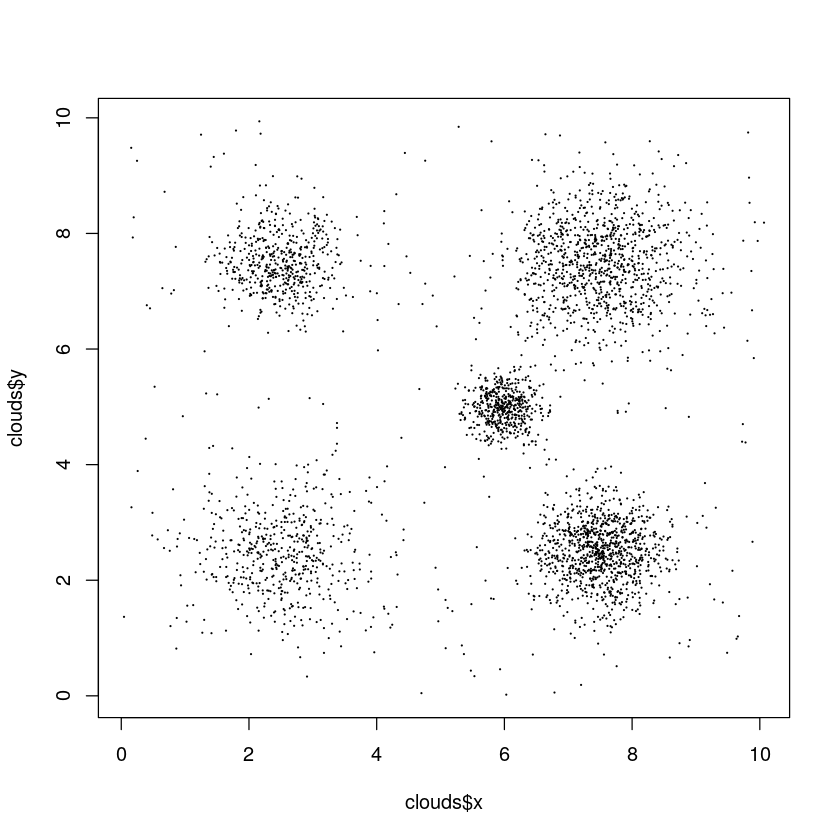

In [4]:
#pdf("gaussian-clouds.pdf")
plot(clouds$x,clouds$y,cex=0.1)
#dev.off()

## Do clustering with function kmeans

In [33]:
clustering=kmeans(clouds,5)

In [6]:
clustering$centers

,x,y
1,6.027612,5.040215
2,2.516215,2.460828
3,7.510309,2.458681
4,7.537681,7.531774
5,2.479816,7.505333


# A function  random.colors(n) will return a vector of n randomly assigned rgb colors

In [7]:
random.colors=function(n){
    u=rep(0,n)
    for (j in 1:n){ u[j]=rgb(runif(1),runif(1),runif(1)) }
    u
    }

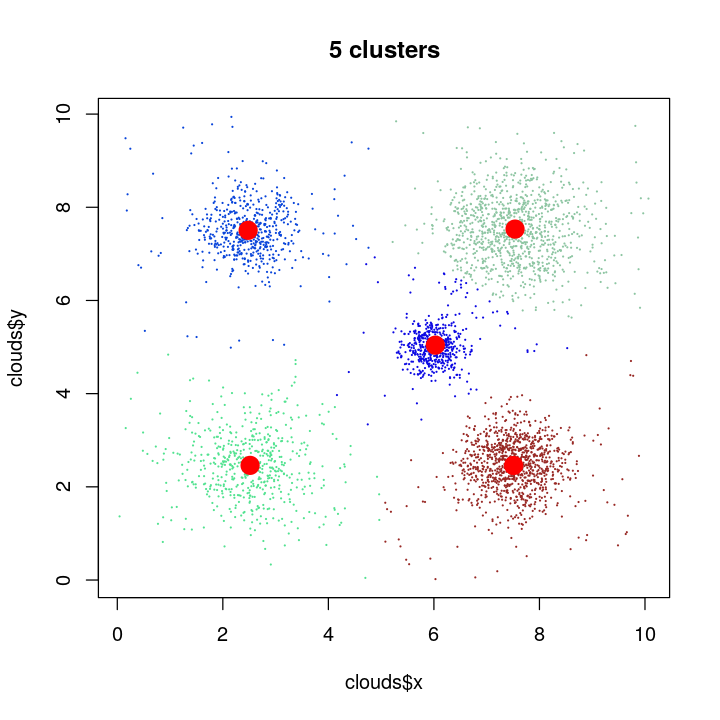

In [37]:
mycolors=random.colors(5)
n=length(clouds$x)
pointcolors=rep(0,n)
for (j in 1:5){
    pointcolors[clustering$cluster==j]=mycolors[j]
}
options(repr.plot.width=6, repr.plot.height=6)
#pdf("clouds-5-clusters.pdf")
plot(clouds$x,clouds$y,cex=0.1,col=pointcolors,main=paste(5,"clusters"))
points(clustering$centers[,1], clustering$centers[,2],col="red",pch=19,cex=2)
#dev.off()

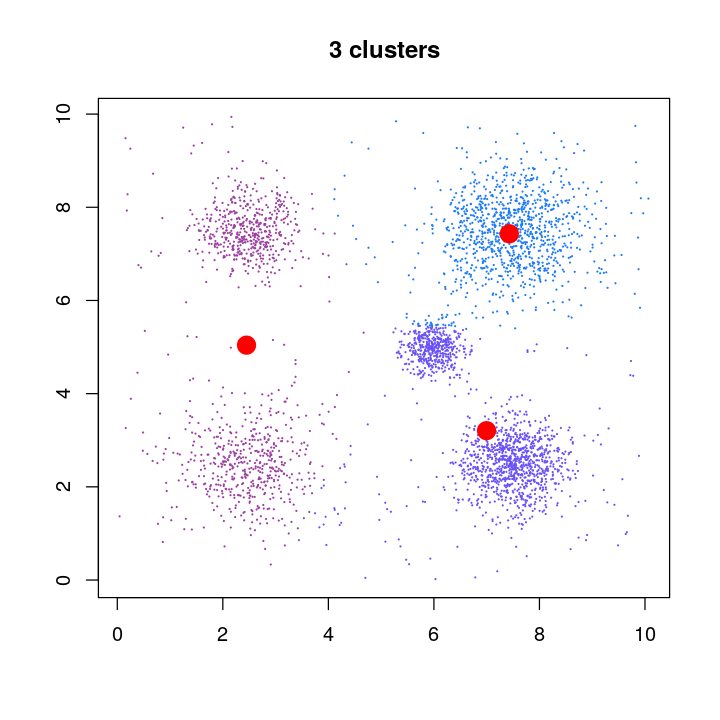

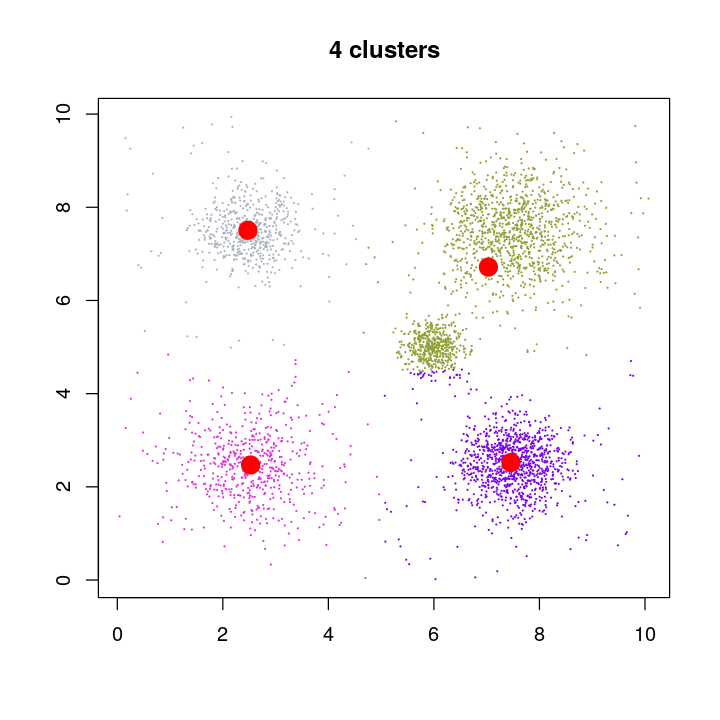

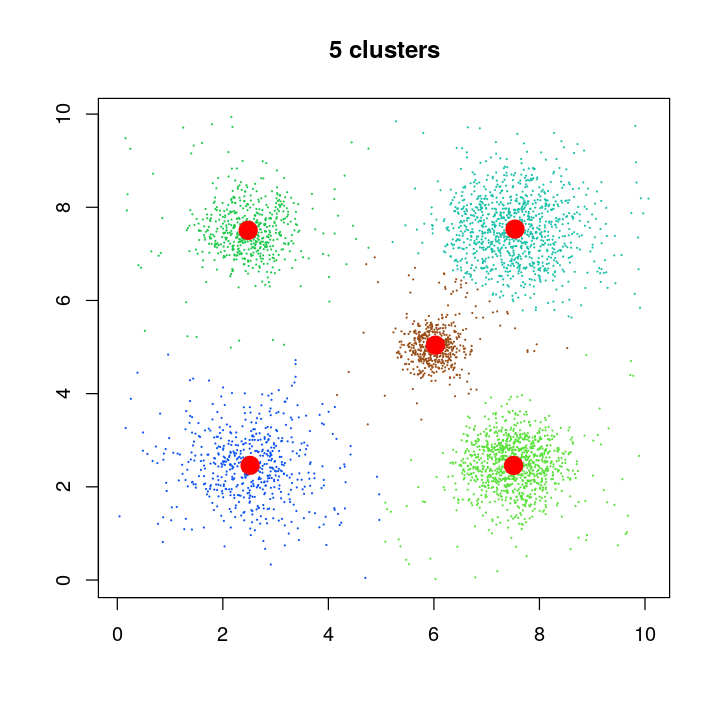

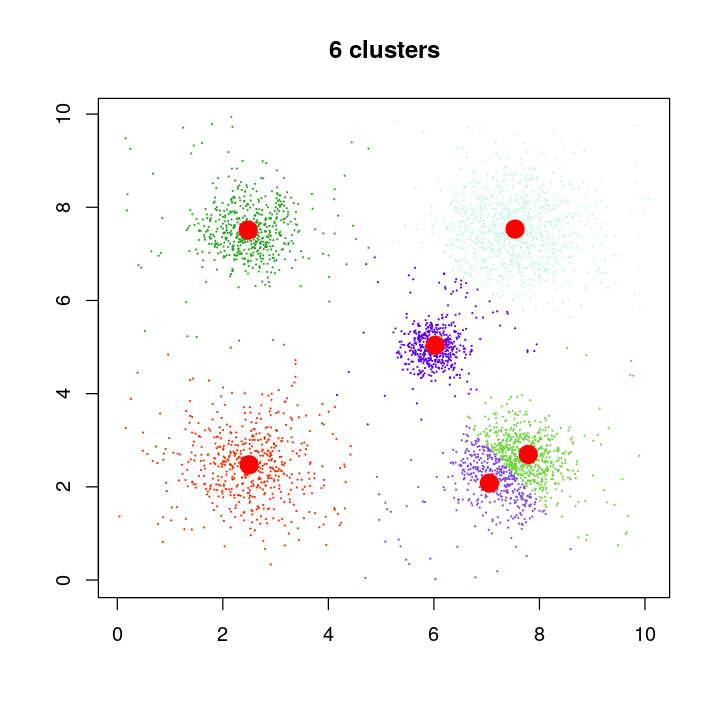

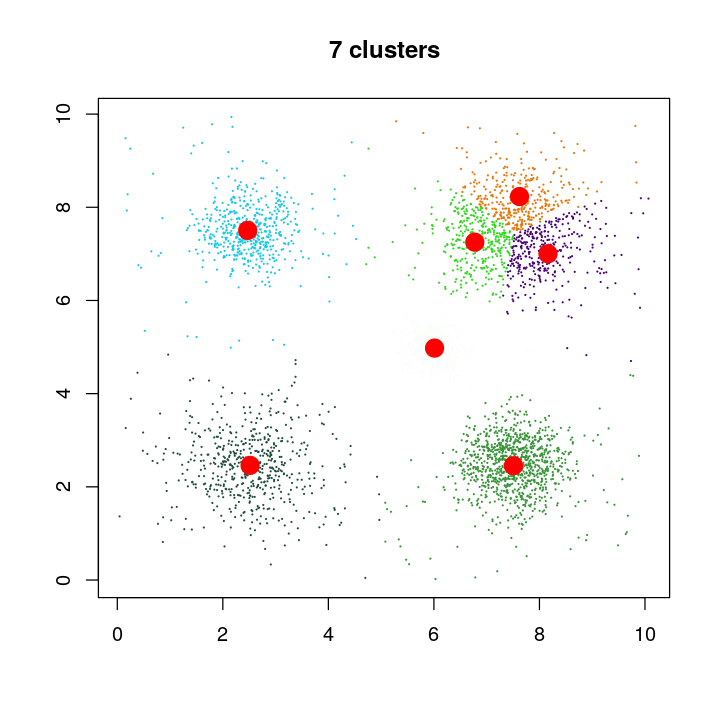

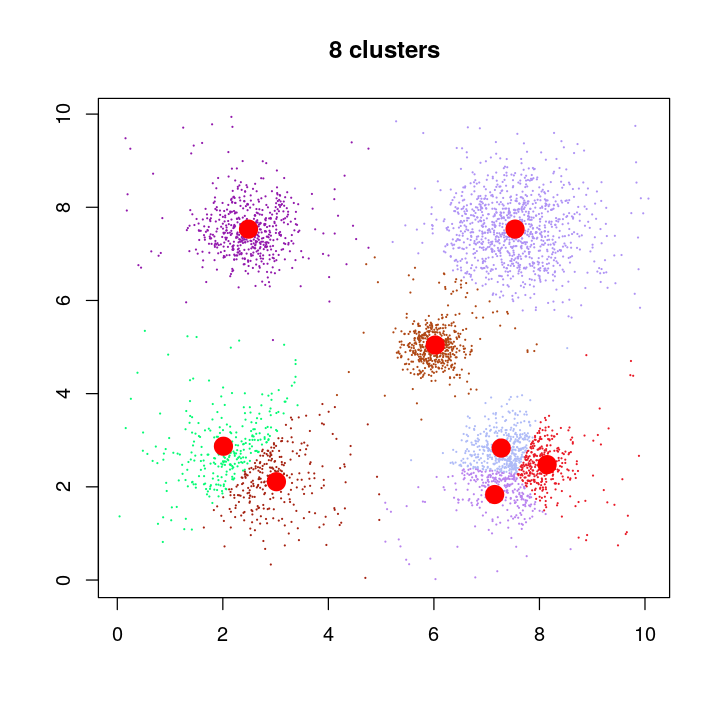

In [17]:
options(repr.plot.width=6, repr.plot.height=6)

for (k in 3:8){
  clustering=kmeans(clouds,k)
  mycolors=random.colors(k)
  pointcolors=rep(0,n)
  for (j in 1:k){
    pointcolors[clustering$cluster==j]=mycolors[j]
  }
  plot(clouds$x,clouds$y,cex=0.1,col=pointcolors,main=paste(k,"clusters"),
       xlab="",ylab="")
  points(clustering$centers[,1], clustering$centers[,2],col="red",cex=2,pch=19)
}

<font style="font-size:24pt"> Evaluate with Silhouette measure

<font style="font-size:18pt">
<li> Let $p_i$ be in some cluster $C$<br><br>
    <li> $\mu_i$ = mean distance from $p_i$ to all other points in $C$ <br><br>
    <li> $\mu'_i$ = mean distance fro $p_i$ to all points NOT in $C$ <br><br>
    <li> $M_i$ = $max(\mu_i, \mu'_i)$<br><br>
    <li> Single point silhouette coefficient is $$s_i = \dfrac{\mu'_i - \mu_i}{M_i}$$<br><br>
    <li> Overally silhouette index is average over all points. $$S=\dfrac{1}{n}\sum s_i$$<br><br>

In [24]:
install.packages("cluster")

Installing package into ‘/home/mathman/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [25]:
library(cluster)

In [26]:
#install.packages("bios2mds")

In [27]:
library(bios2mds)

Loading required package: amap
Loading required package: e1071
Loading required package: scales
Loading required package: rgl


In [28]:
xclusters=c(3:10)
scores=sil.score(clouds,nb.clus=xclusters)

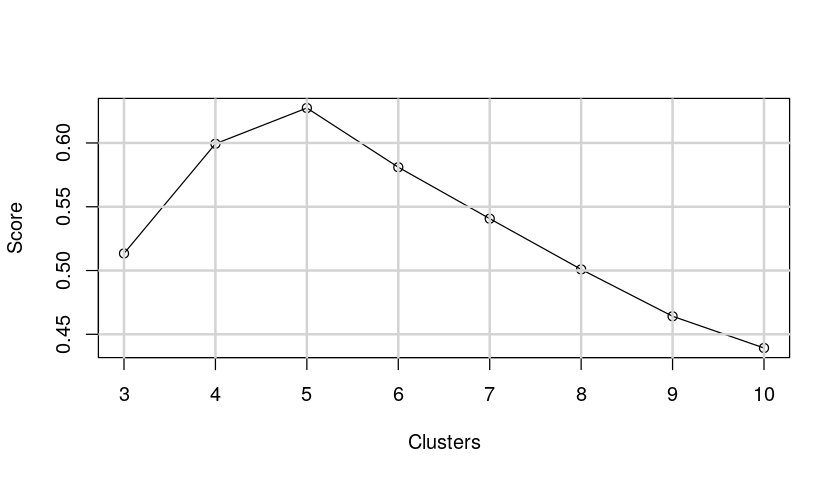

In [39]:
options(repr.plot.width=7, repr.plot.height=4)
#pdf("silhouette-clouds-data-file.pdf",width=7,height=4)
plot(1:10, scores,type="o",xlim=c(3,10),xlab="Clusters", ylab="Score")
grid(lty=1,lwd=2)
#dev.off()

## Build a new data set from random clouds

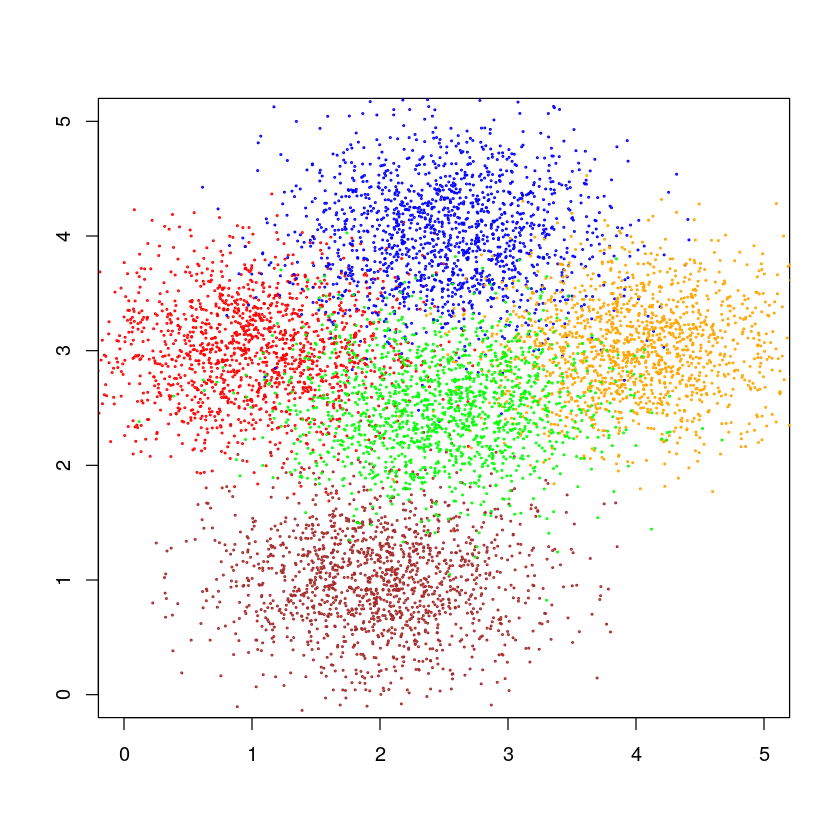

In [67]:
library(MASS)
#
# sd is a diagonal COVARIANCE matrix
#
sd=diag(c(.4,.2))
#
# build five gaussian clouds
#
cloud1=mvrnorm(n=1500,mu=c(1,3),Sigma=sd)
cloud2=mvrnorm(n=1500,mu=c(2.5,4),Sigma=sd)
cloud3=mvrnorm(n=1500,mu=c(4,3),Sigma=sd)
cloud4=mvrnorm(n=1500,mu=c(2,1),Sigma=sd)
cloud5=mvrnorm(n=1500,mu=c(2.5,2.5),Sigma=sd)
#
# plot the clouds
#
options(repr.plot.width=7, repr.plot.height=7)
#pdf("big-cloud-color.pdf")
plot(cloud1[,1],cloud1[,2],cex=.2, col="red", xlim=c(0,5),ylim=c(0,5),
    xlab="",ylab="")
points(cloud2[,1], cloud2[,2], cex=.2, col="blue")
points(cloud3[,1], cloud3[,2], cex=.2, col="orange")
points(cloud4[,1], cloud4[,2], cex=.2, col="brown")
points(cloud5[,1], cloud5[,2], cex=.2, col="green")
#dev.off()

## rbind joins the matrices by column names, i.e., it points all the x's together and all the y's together

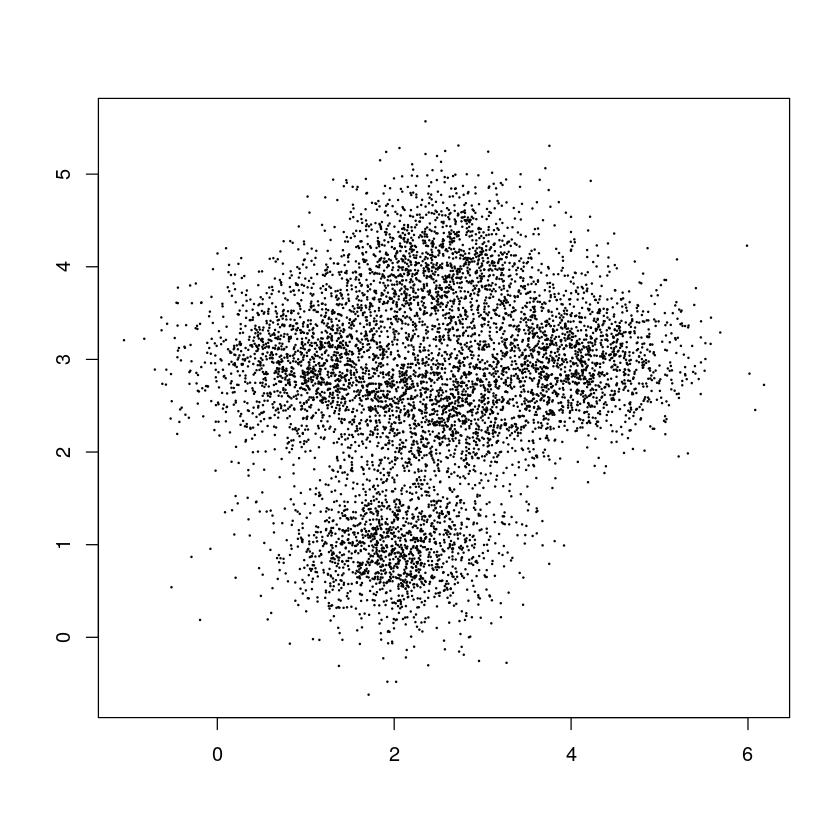

In [44]:
bigcloud=rbind(cloud1, cloud2,cloud3,cloud4,cloud5)
#pdf("a-big-clod.pdf")
plot(bigcloud[,1],bigcloud[,2],cex=.15,xlab="",ylab="")
#dev.off()

In [46]:
clustering=kmeans(bigcloud,5)
n=length(bigcloud[,1])

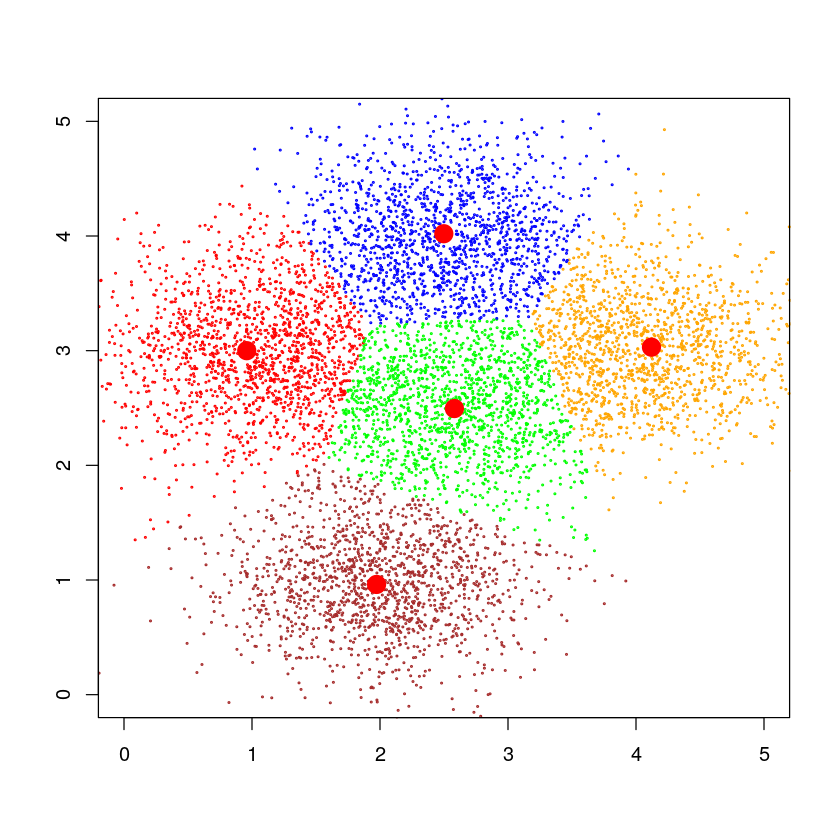

In [83]:
mycolors=random.colors(5)
mycolors=c("green","blue","orange", "brown", "red")
pointcolors=rep(0,n)
x=bigcloud[,1]
y=bigcloud[,2]
for (j in 1:k){
    pointcolors[clustering$cluster==j]=mycolors[j]
}
#pdf("clustered-bigcloud.pdf")
plot(x,y,cex=0.2,col=pointcolors,
       xlab="",ylab="",xlim=c(0,5),ylim=c(0,5),)
points(clustering$centers[,1], 
       clustering$centers[,2],col="red",cex=2,pch=19)
#dev.off()

# Silhouette for Overlapping clouds

In [51]:
scores=sil.score(bigcloud,nb.clus=3:10)

In [84]:
round(scores, 2)

[1]   NA   NA 0.43 0.42 0.44 0.40 0.38 0.36 0.34 0.33

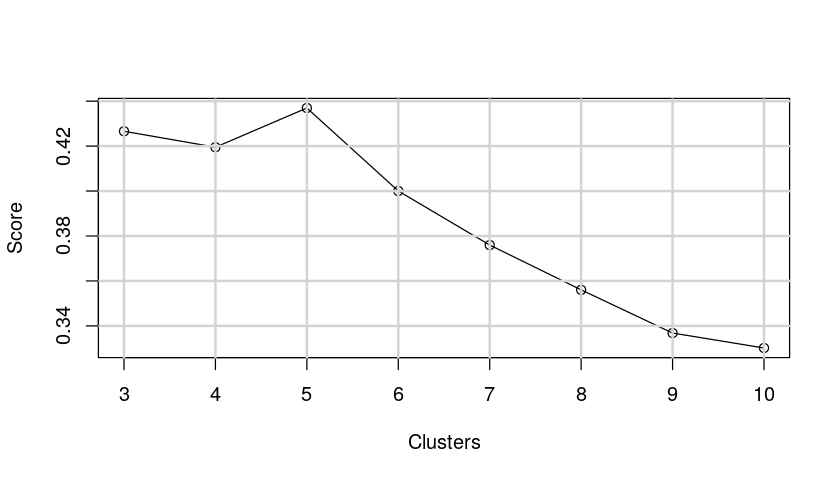

In [53]:
options(repr.plot.width=7, repr.plot.height=4)
#pdf("silhouette-clouds-data-file.pdf",width=7,height=4)
plot(1:10, scores,type="o",xlim=c(3,10),xlab="Clusters", ylab="Score")
grid(lty=1,lwd=2)
#dev.off()

## Non Gaussian Data sets

In [87]:
sq=read.csv("../datasets/squiggles.csv", header = TRUE, sep = ",")

In [88]:
x=sq[,1]
y=sq[,2]

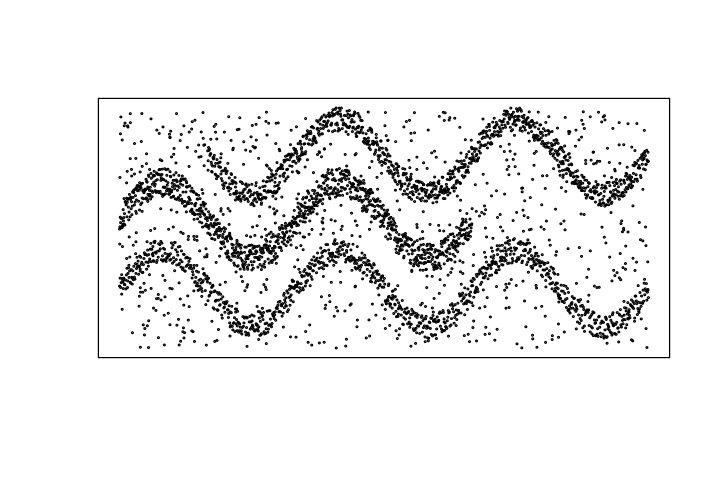

In [102]:
options(repr.plot.width=6, repr.plot.height=4)
#pdf("squiggles.pdf",width=8,height=5)
plot(x,y,cex=.2,axes=FALSE,frame.plot=TRUE,xlab="",ylab="")
#dev.off()

<font style="font-size:16pt">

<li>set.my.colors(clustsers, clustering, colors, X) returns a list of colors for plotting

<li>clusters is the number of clusters

<li>Clustering is the output of the kmeans function

<li>colors is a list of color names

<li>X is the input matrix to the kmeans function

In [119]:
set.my.colors=function(clusters, kmeans.output, my.colors, XDATA){
    n=length(XDATA[,1])
    pointcolors=rep(0,n) 
    ncolors = length(my.colors)
    for (j in 1:clusters){
        pointcolors[kmeans.output$cluster==j]=my.colors[j]   
    }
    pointcolors
}

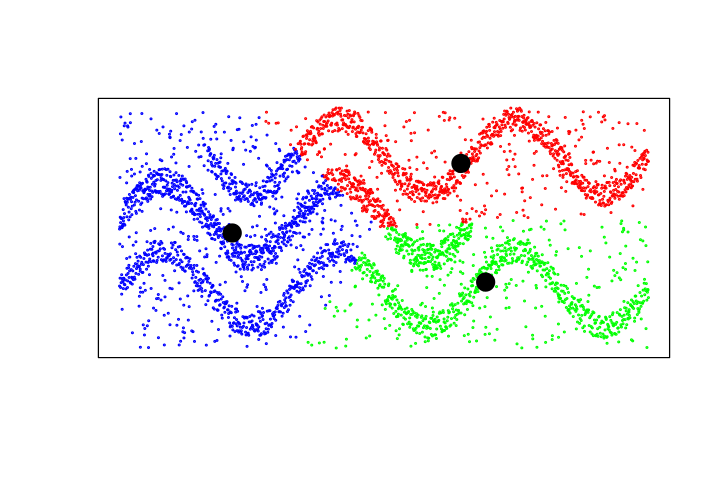

In [126]:
clustering=kmeans(sq,3)

pointcolors = set.my.colors(3, clustering, c("red","blue", "green"), sq)

#pdf("clustered-squiggles",width=8,height=5)
plot(x,y,cex=0.2,col=pointcolors,
       xlab="",ylab="",axes=FALSE,frame.plot=TRUE) 
points(clustering$centers[,1], 
       clustering$centers[,2],col="black",cex=2,pch=19)
#dev.off()

In [127]:
scores=sil.score(sq,nb.clus=3:13)

In [128]:
round(scores,2)

[1]   NA   NA 0.39 0.39 0.40 0.41 0.40 0.40 0.41 0.41 0.42 0.43 0.43

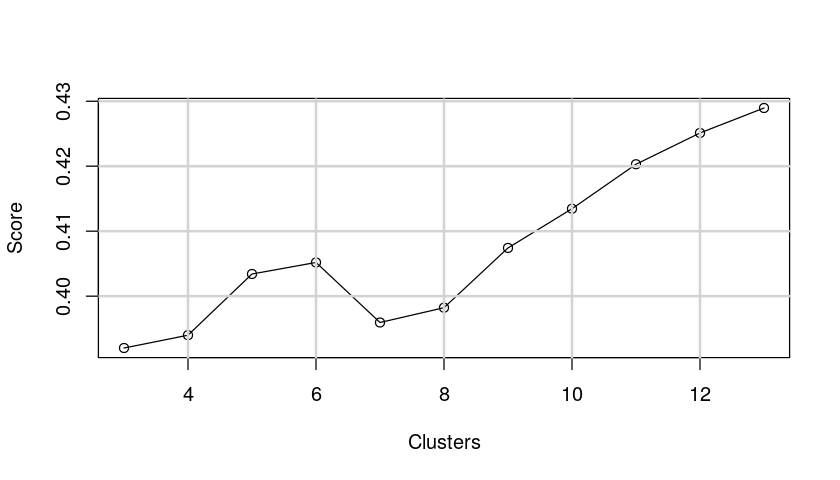

In [131]:
options(repr.plot.width=7, repr.plot.height=4)
#pdf("silhouette-clouds-data-file.pdf",width=7,height=4)
plot(1:13, scores,type="o",xlim=c(3,13),xlab="Clusters", ylab="Score")
grid(lty=1,lwd=2)
#dev.off()

## Smiley Set

In [133]:
smiley=read.csv("../datasets/smiley.csv", header = TRUE, sep = ",")

In [134]:
x=smiley[,1]
y=smiley[,2]

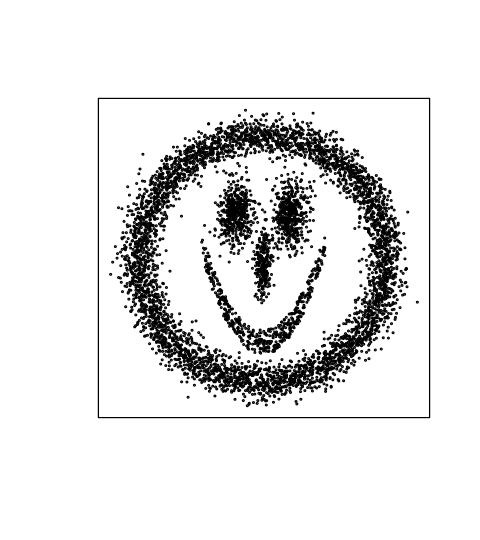

In [139]:
options(repr.plot.width=4, repr.plot.height=4.5)
#pdf("smiley",width=5,height=5)
plot(x,y,cex=.2,axes=FALSE,frame.plot=TRUE,xlab="",ylab="")
#dev.off()

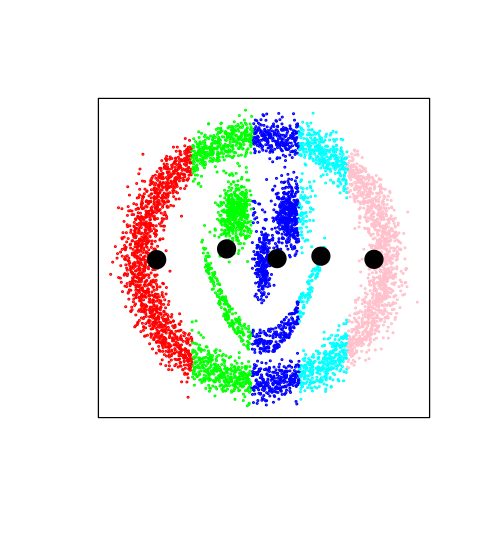

In [145]:
clustering=kmeans(smiley,5)

pointcolors = set.my.colors(5, clustering, c("red","blue", "green","pink","cyan"), smiley)

#pdf("clustered-smiley",width=5,height=5)
plot(x,y,cex=0.2,col=pointcolors,
       xlab="",ylab="",axes=FALSE,frame.plot=TRUE) 
points(clustering$centers[,1], 
       clustering$centers[,2],col="black",cex=2,pch=19)
#dev.off()